In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('HR_comma_sep.csv')

In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (14999, 10)


In [82]:
print("Columns:", df.columns.tolist())

Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary', 'salary_numeric']


In [12]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [13]:
print("\nData Types:\n", df.dtypes)


Data Types:
 satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


In [14]:
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
display(df.describe())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Univariate Analysis (Distributions)

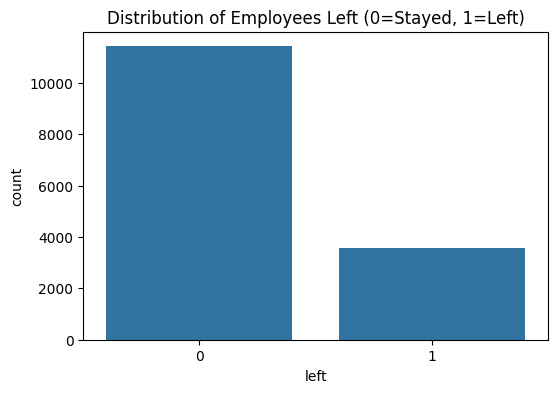

In [22]:
# Distribution of the Target Variable 'left'
plt.figure(figsize=(6, 4))
sns.countplot(x='left', data=df)
plt.title('Distribution of Employees Left (0=Stayed, 1=Left)')
plt.show()

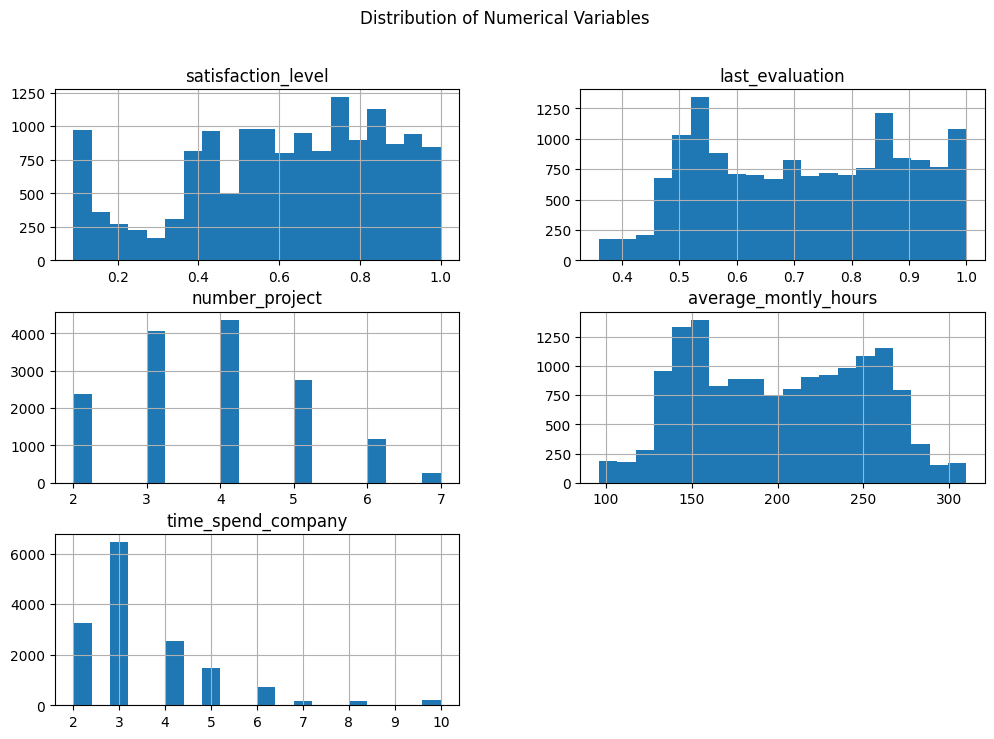

In [23]:
#Numerical Feature Distributions
num_cols = ['satisfaction_level','last_evaluation','number_project',
            'average_montly_hours','time_spend_company']

df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numerical Variables")
plt.show()


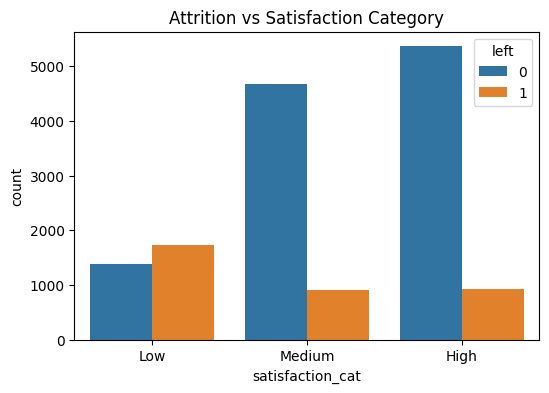

In [13]:
# Create satisfaction level categories
df['satisfaction_cat'] = pd.cut(df['satisfaction_level'],
                                bins=[0, 0.4, 0.7, 1],
                                labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction_cat', hue='left', data=df)
plt.title('Attrition vs Satisfaction Category')
plt.show()


## Bivariate Analysis (vs Target)

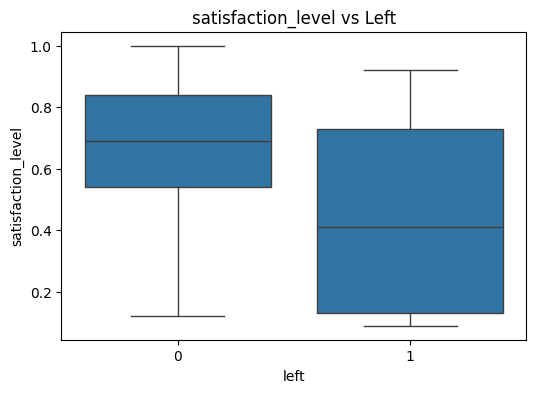

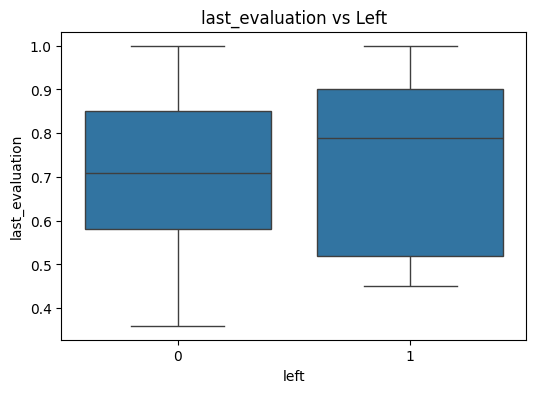

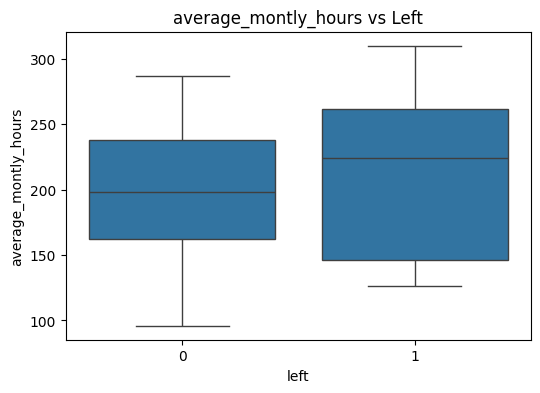

In [25]:
# Numerical Features vs Left (Boxplots)
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='left', y=col, data=df)
    plt.title(f'{col} vs Left')
    plt.show()

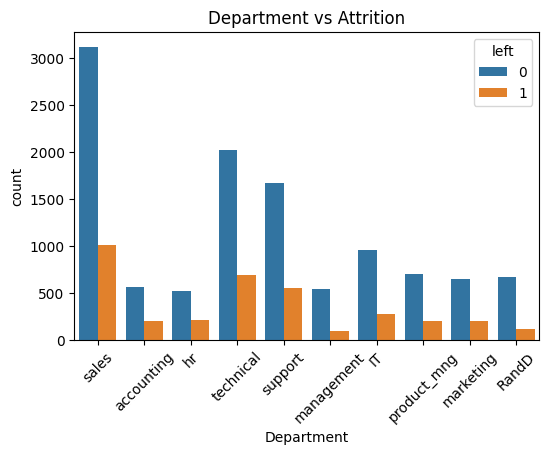

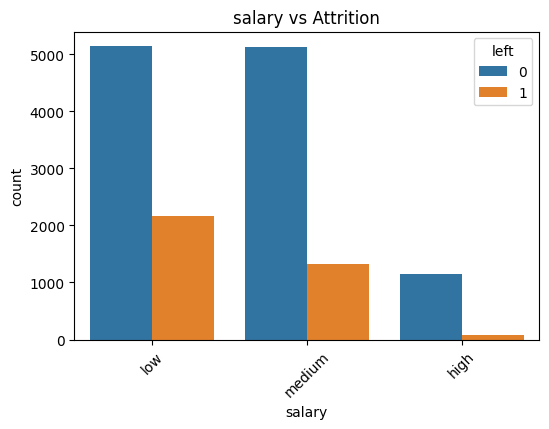

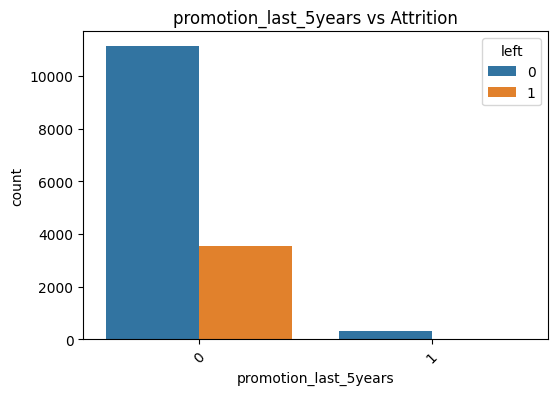

In [27]:
# Define categorical features correctly
cat_features = ['Department', 'salary', 'promotion_last_5years']
# Bar charts
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='left', data=df)
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.show()


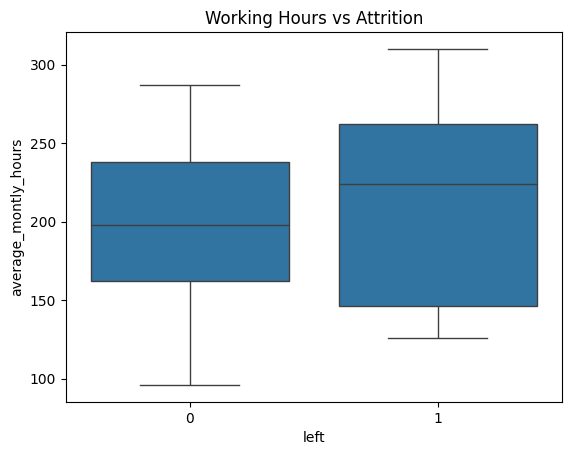

In [15]:
#Monthly Working Hours vs Attrition
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title('Working Hours vs Attrition')
plt.show()


## Multivariate Analysis

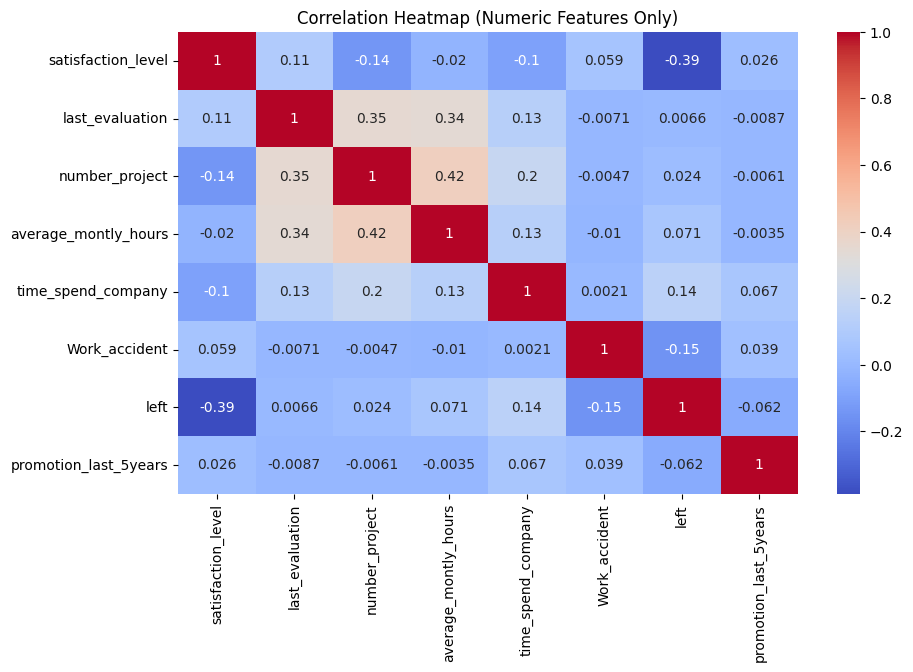

In [10]:
# Correlation Heatmap with only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


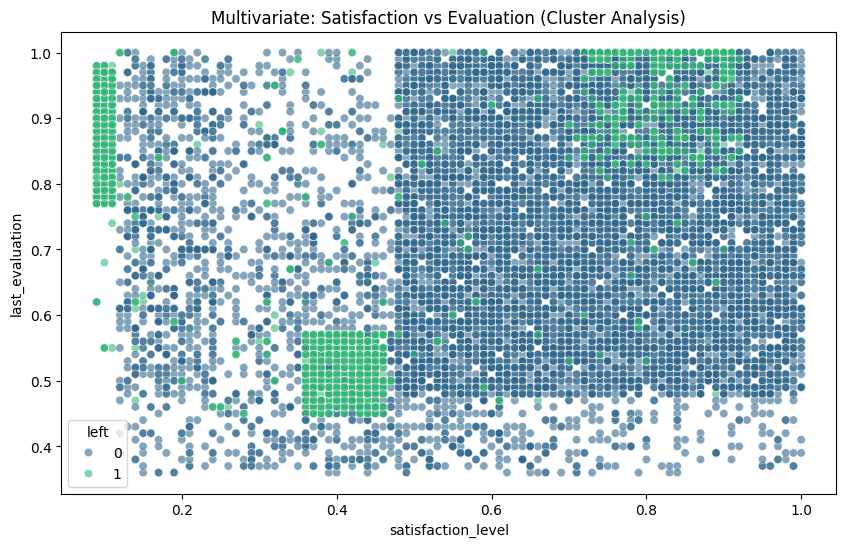

In [12]:
# 3.2 Interaction Plot (Satisfaction vs Evaluation colored by Left)
# Variables involved: 1. Satisfaction, 2. Evaluation, 3. Left
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', 
                data=df, alpha=0.6, palette='viridis')
plt.title('Multivariate: Satisfaction vs Evaluation (Cluster Analysis)')
plt.show()


## Conclusion


- **Low Satisfaction = High Attrition**  
  Employees with low satisfaction are most likely to leave.

- **Burnout of Top Performers**  
  Employees with high evaluation but long working hours are leaving due to overload.

- **3–5 Years = Highest Risk Zone**  
  Attrition peaks between the 3rd and 5th year of service.

- **Project Balance Matters**
  - Too few projects (boredom) → employees leave  
  - Too many projects (stress) → employees leave  
  - Best retention when employees handle **3–5 projects**

- **Salary Impacts Retention**  
  Employees with **low/medium salary** leave more often.  
  High salary works as a strong retention factor.

- **Promotion Prevents Attrition**  
  Employees who received a promotion in the last 5 years almost never leave.


## feature engineering

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df_fe = df.copy()

In [23]:
# Encoding Categorical Variables
le = LabelEncoder()
df_fe['Department'] = le.fit_transform(df_fe['Department'])
df_fe['salary'] = df_fe['salary'].map({'low': 1, 'medium': 2, 'high': 3})

### Feature Creation

In [43]:
# Create a Burnout Index (High evaluation + high workload)
df_fe['burnout_risk'] = df_fe['last_evaluation'] * df_fe['average_montly_hours']

In [44]:
# Tenure Risk Feature (Most leave 3–5 years)
df_fe['tenure_risk'] = df_fe['time_spend_company'].apply(
    lambda x: 1 if 3 <= x <= 5 else 0
)

In [45]:
# Workload category based on number of projects
df_fe['workload_category'] = df_fe['number_project'].apply(
    lambda x: 0 if x < 3 else (1 if 3 <= x <= 5 else 2)
)

In [46]:
# Outlier Treatment (Cap extreme working hours)
upper_bound = df_fe['average_montly_hours'].quantile(0.99)
df_fe['average_montly_hours'] = np.where(
    df_fe['average_montly_hours'] > upper_bound,
    upper_bound,
    df_fe['average_montly_hours']
)

In [47]:
# Scaling Numerical Data
scaler = StandardScaler()
num_cols = ['satisfaction_level', 'last_evaluation', 'average_montly_hours',
            'burnout_risk']
df_fe[num_cols] = scaler.fit_transform(df_fe[num_cols])

In [48]:
# Show updated dataset information
print("\nUpdated DataFrame Shape:", df_fe.shape)
df_fe.head()


Updated DataFrame Shape: (14999, 14)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,satisfaction_cat,burnout_risk,tenure_risk,workload_category
0,-0.936495,-1.087275,2,-0.882865,3,0,1,0,7,0,1,-1.105271,1,0
1,0.752814,0.840707,5,1.223946,6,0,1,0,7,1,0,1.361798,0,1
2,-2.022479,0.957554,7,1.424595,4,0,1,0,7,1,1,1.605536,1,2
3,0.431041,0.899131,5,0.441416,5,0,1,0,7,0,0,0.818248,1,1
4,-0.976716,-1.145699,2,-0.842735,3,0,1,0,7,0,1,-1.114472,1,0


## model training

In [50]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

df_fe = df.copy()

# Encode Salary (Ordinal)
df_fe['salary'] = df_fe['salary'].map({'low': 0, 'medium': 1, 'high': 2})

# Encode Department (Categorical)
df_fe['Department'] = df_fe['Department'].astype('category').cat.codes

# Identify categorical engineered features that actually exist
possible_cat_cols = ['satisfaction_cat', 'tenure_risk', 'workload_category', 'burnout_risk']
label_encode_cols = [col for col in possible_cat_cols if col in df_fe.columns]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in label_encode_cols:
    df_fe[col] = le.fit_transform(df_fe[col])

# Split X & y
X = df_fe.drop('left', axis=1)
y = df_fe['left']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
df_fe.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'satisfaction_cat'],
      dtype='object')

In [52]:
## Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7916666666666666

Confusion Matrix:
 [[2110  184]
 [ 441  265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      2294
           1       0.59      0.38      0.46       706

    accuracy                           0.79      3000
   macro avg       0.71      0.65      0.66      3000
weighted avg       0.77      0.79      0.77      3000



In [53]:
## Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9743333333333334

Confusion Matrix:
 [[2276   18]
 [  59  647]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2294
           1       0.97      0.92      0.94       706

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [54]:
## Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7846666666666666

Confusion Matrix:
 [[2293    1]
 [ 645   61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      2294
           1       0.98      0.09      0.16       706

    accuracy                           0.78      3000
   macro avg       0.88      0.54      0.52      3000
weighted avg       0.83      0.78      0.71      3000



In [56]:
## Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9886666666666667

Confusion Matrix:
 [[2286    8]
 [  26  680]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [57]:
# Model Performance Comparison
results = {
    "Model": ["Logistic Regression", "Decision Tree", "SVM", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf),
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.791667
1        Decision Tree  0.974333
2                  SVM  0.784667
3        Random Forest  0.988667


## PCA

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Load data
df = pd.read_csv('HR_comma_sep.csv')
df['salary_numeric'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})
X = pd.get_dummies(df.drop(['salary','left'], axis=1))
y = df['left']

In [75]:
# Scale & PCA
X_scaled = MinMaxScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)
print("Explained variance ratio:", PCA(n_components=2).fit(X_scaled).explained_variance_ratio_)

Explained variance ratio: [0.17134447 0.11871369]


## hyper parameter

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [77]:
#Preprocess Data
df['salary_numeric'] = df['salary'].map({'low':1,'medium':2,'high':3})
X = pd.get_dummies(df.drop(['salary','left'], axis=1))
y = df['left']

#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [78]:
#Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Hyperparameter Grid 
param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10]
}

In [80]:
# GridSearchCV 
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)
print("GridSearchCV Best Score:", grid.best_score_)
print("GridSearchCV Best Params:", grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV Best Score: 0.9905829512296791
GridSearchCV Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
# RandomizedSearchCV 
random = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_grid, n_iter=5, cv=5, n_jobs=-1, verbose=1, random_state=42)
random.fit(X_train_scaled, y_train)
print("RandomizedSearchCV Best Score:", random.best_score_)
print("RandomizedSearchCV Best Params:", random.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
RandomizedSearchCV Best Score: 0.9900829164929833
RandomizedSearchCV Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
